In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

# Loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

<Axes: >

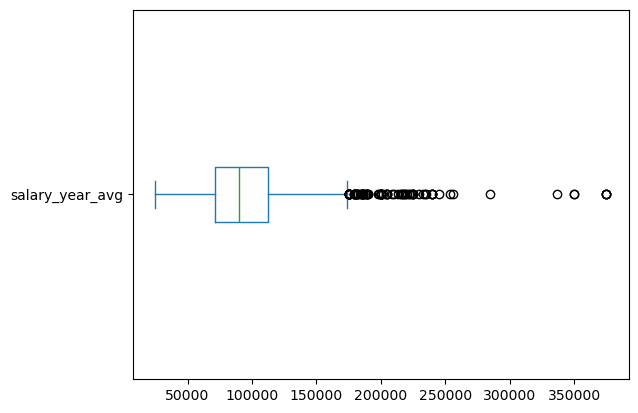

In [2]:
df_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()
df_US = df_US.dropna(subset=["salary_year_avg"]) #to specify the column or row you wanna drop
df_US["salary_year_avg"].sample(10)
df_US["salary_year_avg"].plot(kind="box", vert=False)

#OR
# plt.boxplot(df_US["salary_year_avg"])


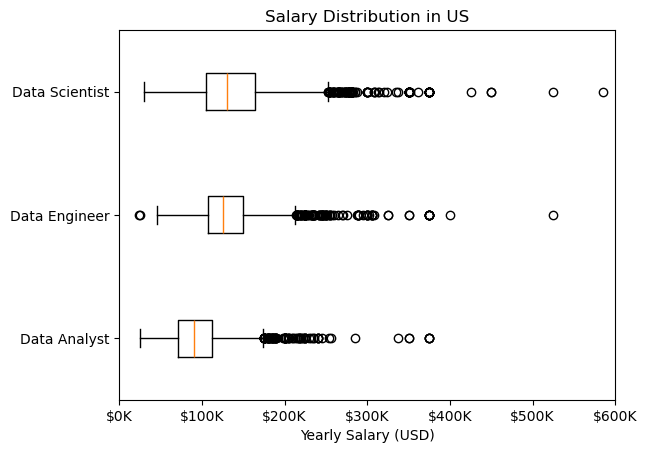

In [9]:
job_titles = ["Data Analyst", "Data Engineer", "Data Scientist"]

df_US_job = df[(df["job_title_short"].isin(job_titles)) & (df["job_country"] == "United States")].copy()
df_US_job = df_US_job.dropna(subset=["salary_year_avg"])
job_list = [df_US_job[df_US_job["job_title_short"] == job_title]["salary_year_avg"] for job_title in job_titles]
plt.boxplot(job_list, tick_labels=job_titles, vert=False)
plt.title("Salary Distribution in US")
plt.xlabel("Yearly Salary (USD)")

ax = plt.gca()

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
plt.xlim(0, 600000)
plt.show()

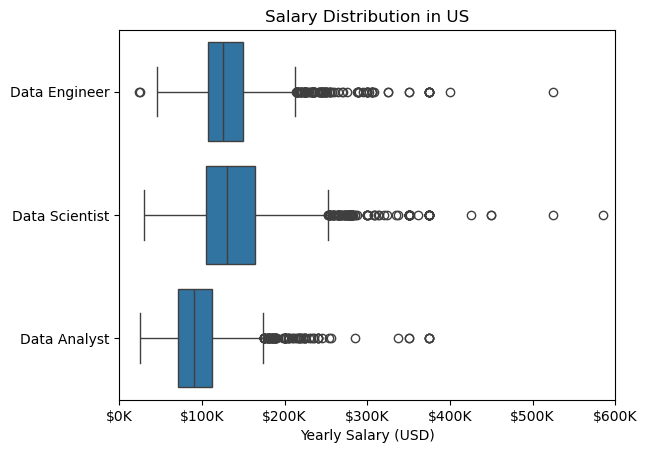

In [14]:
#Using Seaborn Method
import seaborn as sns

sns.boxplot(data=df_US_job, x="salary_year_avg", y="job_title_short")
plt.title("Salary Distribution in US")
plt.xlabel("Yearly Salary (USD)")
plt.ylabel("")
ticks_x = plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K")
plt.gca().xaxis.set_major_formatter(ticks_x)

plt.xlim(0, 600000)
plt.show()